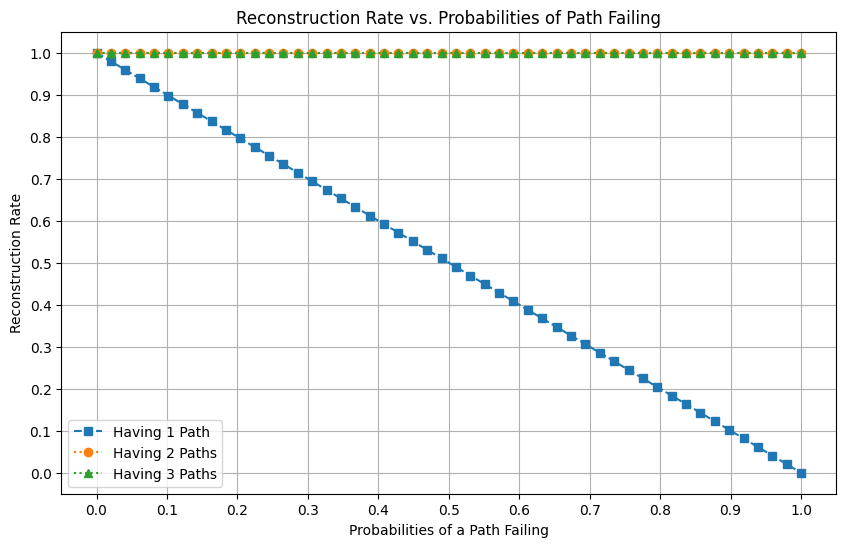

In [1]:
# Reconstruction Rate vs Proability of Path Failure

import matplotlib.pyplot as plt
import numpy as np

probability_of_failure = np.linspace(0, 1, 50)

# reconstruction_rate_1 = 1- probability_of_failure **2
# reconstruction_rate_2= 1- probability_of_failure **3
# reconstruction_rate_3 = 1- probability_of_failure **4

reconstruction_rate_1 = 1 - probability_of_failure  
reconstruction_rate_2 = np.ones_like(probability_of_failure) 
reconstruction_rate_3 = np.ones_like(probability_of_failure)  

plt.figure(figsize=(10,6))

plt.plot(probability_of_failure, reconstruction_rate_1, label="Having 1 Path", marker= "s", linestyle= "--")
plt.plot(probability_of_failure, reconstruction_rate_2, label="Having 2 Paths", marker= "o", linestyle= ":")
plt.plot(probability_of_failure, reconstruction_rate_3, label="Having 3 Paths", marker= "^", linestyle= ":")

plt.title("Reconstruction Rate vs. Probabilities of Path Failing")
plt.xlabel("Probabilities of a Path Failing")
plt.ylabel("Reconstruction Rate")
plt.grid(True)
plt.legend()
plt.xticks(np.arange(0, 1.10, .10))
plt.yticks(np.arange(0, 1.10, .10))

plt.show()

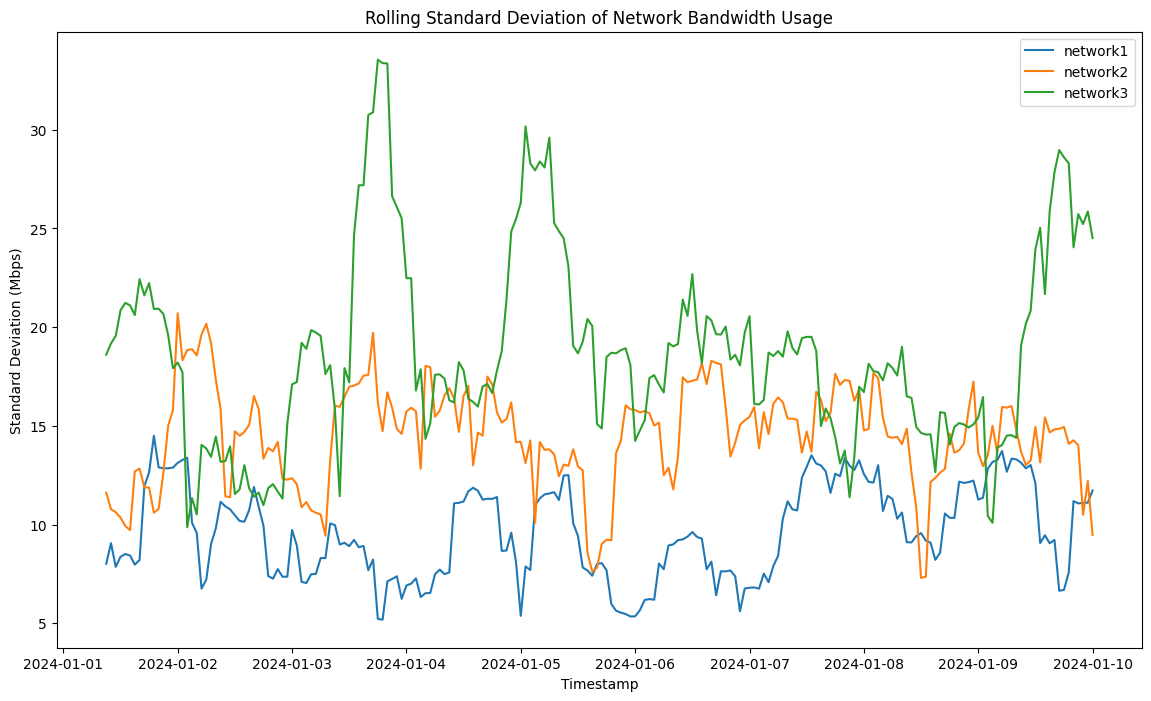

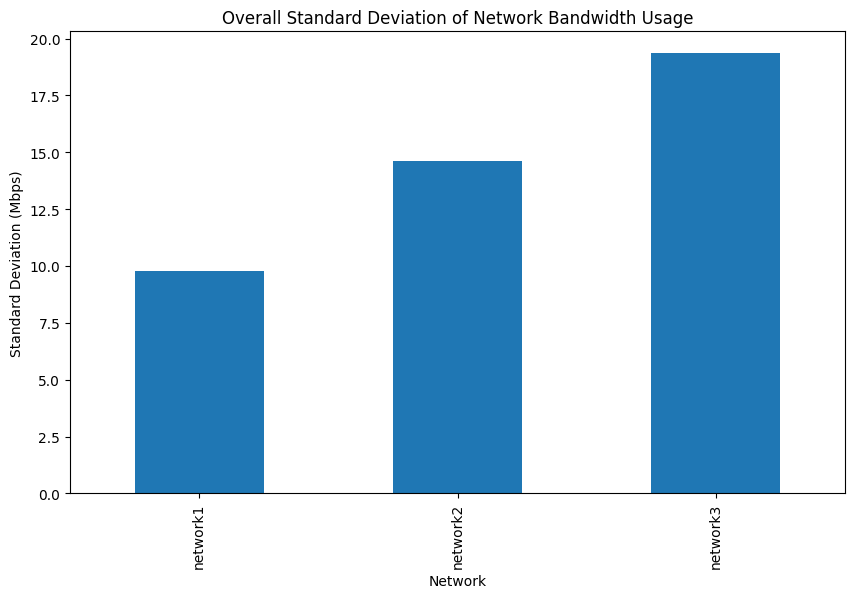

In [2]:
# Bandwidth with Multipath

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('network_bandwidth.csv')
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)
data.head()

# Define a rolling window size
window_size = 10  # for example, 10 time units

# Calculate rolling standard deviation for each network
rolling_std = data.rolling(window=window_size).std()

# Plot the rolling standard deviation
plt.figure(figsize=(14, 8))
for column in data.columns:
    plt.plot(rolling_std.index, rolling_std[column], label=column)

plt.title('Rolling Standard Deviation of Network Bandwidth Usage')
plt.xlabel('Timestamp')
plt.ylabel('Standard Deviation (Mbps)')
plt.legend()
plt.show()

# Calculate overall standard deviation
overall_std = data.std()

# Plot overall standard deviation
overall_std.plot(kind='bar', figsize=(10, 6))
plt.title('Overall Standard Deviation of Network Bandwidth Usage')
plt.xlabel('Network')
plt.ylabel('Standard Deviation (Mbps)')
plt.show()




/var/folders/tr/m7nnfyd94_jfxmdwqvwq7hg40000gn/T/ipykernel_31700/1089794945.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start='2023-01-01', end='2023-01-10', freq='H')


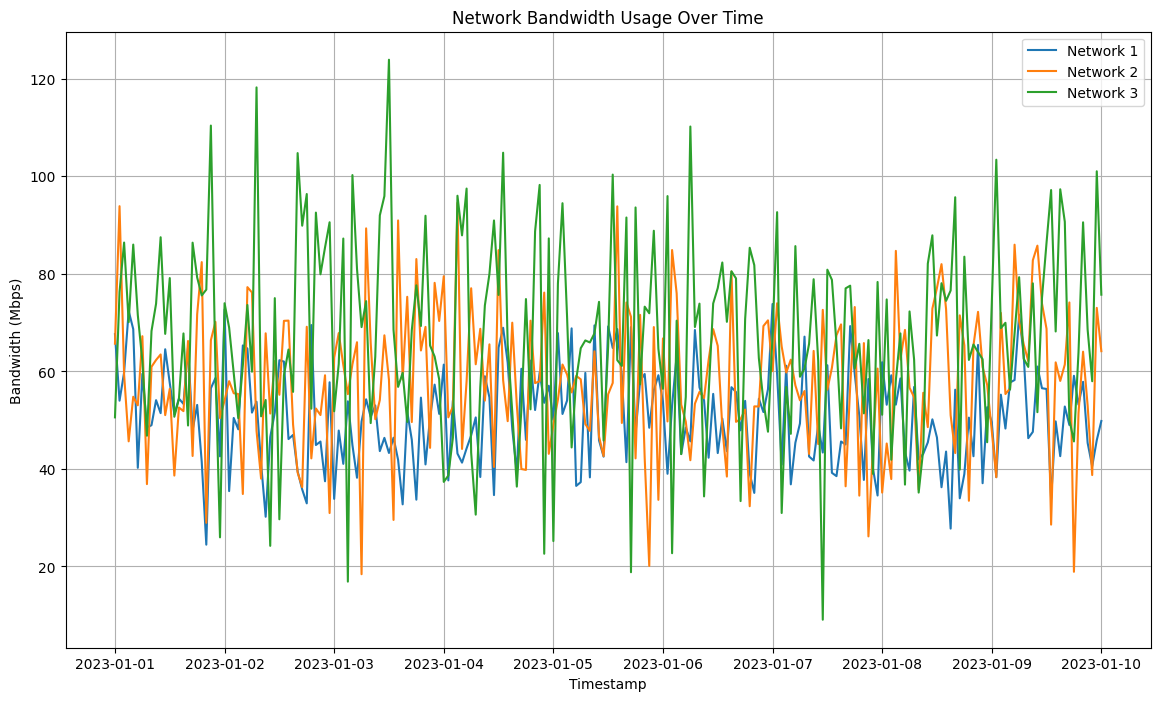

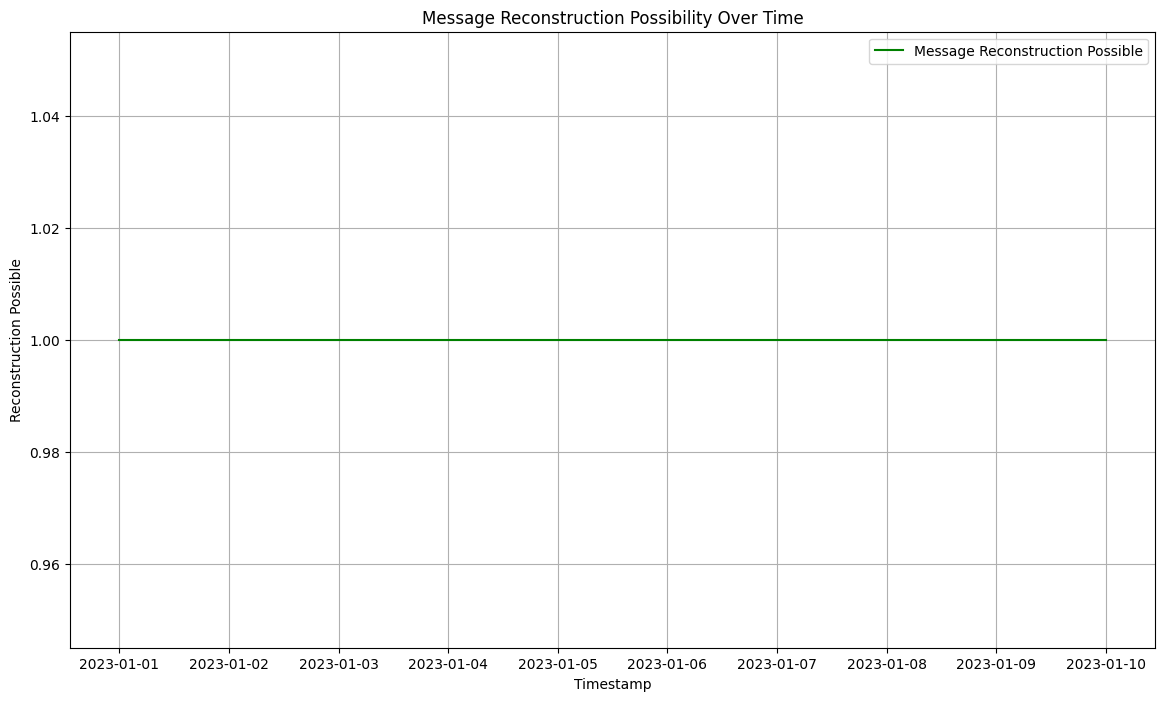

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic data
date_rng = pd.date_range(start='2023-01-01', end='2023-01-10', freq='H')
data = pd.DataFrame(date_rng, columns=['timestamp'])

# Simulate bandwidth data for three network paths
np.random.seed(0)
data['network1'] = np.random.normal(loc=50, scale=10, size=(len(date_rng)))
data['network2'] = np.random.normal(loc=60, scale=15, size=(len(date_rng)))
data['network3'] = np.random.normal(loc=70, scale=20, size=(len(date_rng)))

# Convert timestamp to datetime and set as index
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# Display the first few rows of the data
data.head()

# Plot the bandwidth usage over time for each network path
plt.figure(figsize=(14, 8))
plt.plot(data.index, data['network1'], label='Network 1')
plt.plot(data.index, data['network2'], label='Network 2')
plt.plot(data.index, data['network3'], label='Network 3')

plt.title('Network Bandwidth Usage Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Bandwidth (Mbps)')
plt.legend()
plt.grid(True)
plt.show()

# Function to check if message can be reconstructed
def can_reconstruct_message(data, required_paths=2):
    reconstruction_possible = (data > 0).sum(axis=1) >= required_paths
    return reconstruction_possible

# Check if message can be reconstructed at each time step
reconstruction_possible = can_reconstruct_message(data[['network1', 'network2', 'network3']])

# Plot the reconstruction possibility over time
plt.figure(figsize=(14, 8))
plt.plot(data.index, reconstruction_possible, label='Message Reconstruction Possible', color='green')

plt.title('Message Reconstruction Possibility Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Reconstruction Possible')
plt.legend()
plt.grid(True)
plt.show()


/var/folders/tr/m7nnfyd94_jfxmdwqvwq7hg40000gn/T/ipykernel_31700/4188636355.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start='2024-01-01', end='2024-01-10', freq='H')


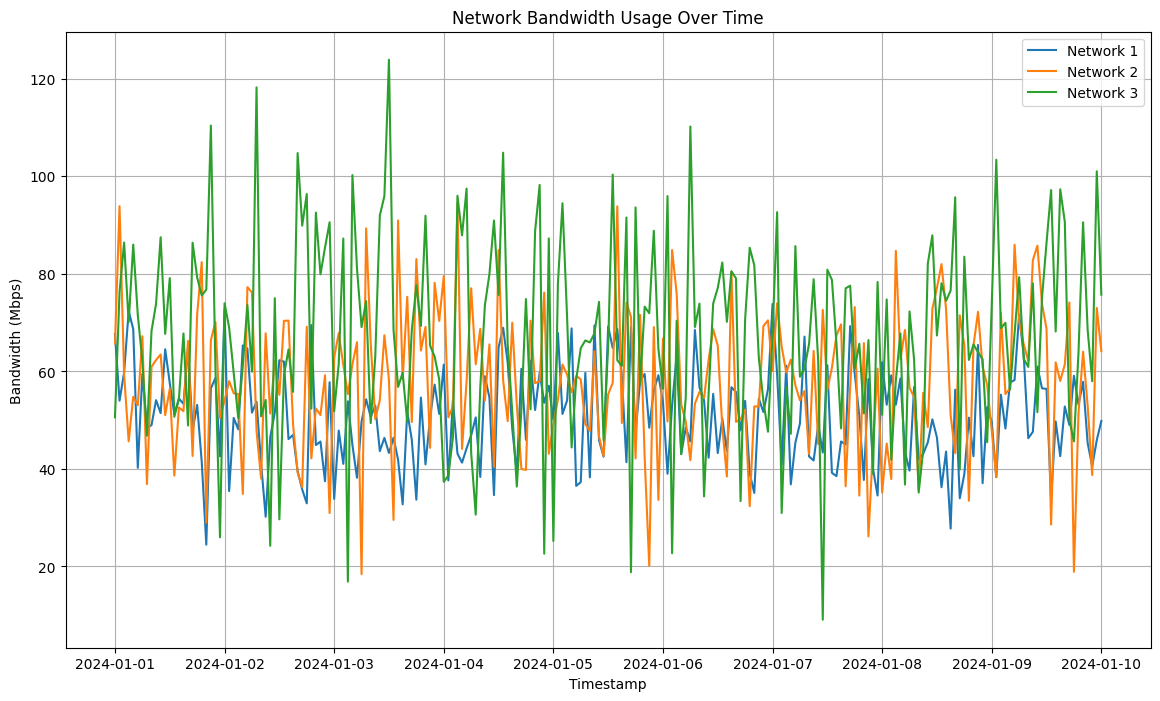

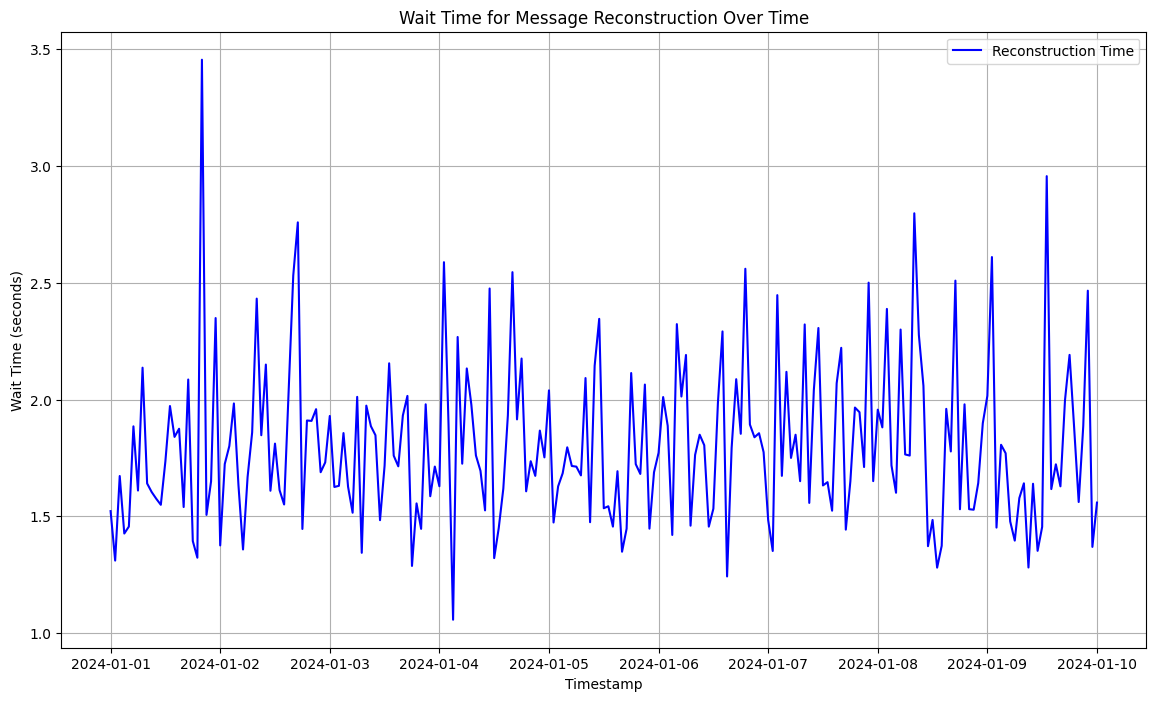

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate Synthetic Data
date_rng = pd.date_range(start='2024-01-01', end='2024-01-10', freq='H')
data = pd.DataFrame(date_rng, columns=['timestamp'])

# Simulate bandwidth data for three network paths
np.random.seed(0)
data['network1'] = np.random.normal(loc=50, scale=10, size=(len(date_rng)))
data['network2'] = np.random.normal(loc=60, scale=15, size=(len(date_rng)))
data['network3'] = np.random.normal(loc=70, scale=20, size=(len(date_rng)))

# Convert timestamp to datetime and set as index
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)


message_size = 100  # in MB

# Calculate the time to send each part of the message over the respective paths
data['time_network1'] = message_size / data['network1']
data['time_network2'] = message_size / data['network2']
data['time_network3'] = message_size / data['network3']

# Determine the wait time for reconstruction (time taken for any two parts to arrive)
data['reconstruction_time'] = data[['time_network1', 'time_network2', 'time_network3']].apply(lambda row: sorted(row)[1], axis=1)


# Display the first few rows of the data
data.head()

# Plot the bandwidth usage over time for each network path
plt.figure(figsize=(14, 8))
plt.plot(data.index, data['network1'], label='Network 1')
plt.plot(data.index, data['network2'], label='Network 2')
plt.plot(data.index, data['network3'], label='Network 3')

plt.title('Network Bandwidth Usage Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Bandwidth (Mbps)')
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Plot Wait Time for Reconstruction
plt.figure(figsize=(14, 8))
plt.plot(data.index, data['reconstruction_time'], label='Reconstruction Time', color='blue')


plt.title('Wait Time for Message Reconstruction Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Wait Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()





/var/folders/tr/m7nnfyd94_jfxmdwqvwq7hg40000gn/T/ipykernel_31700/604993823.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start='2024-01-01', end='2024-01-10', freq='H')


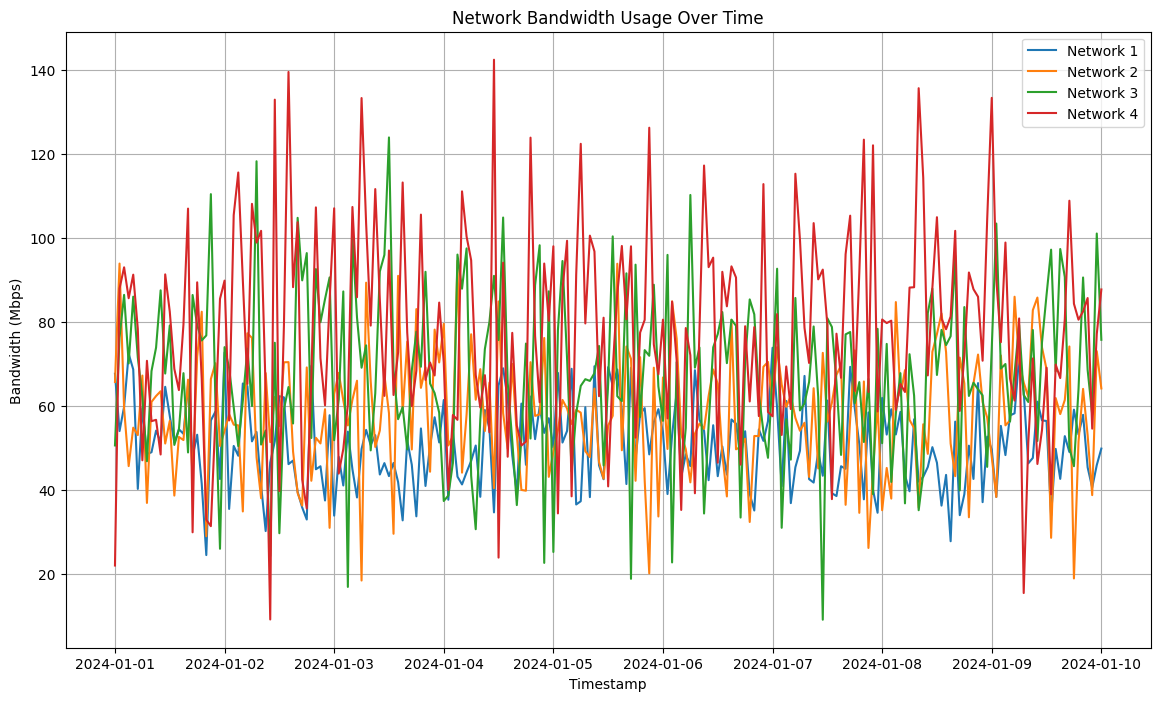

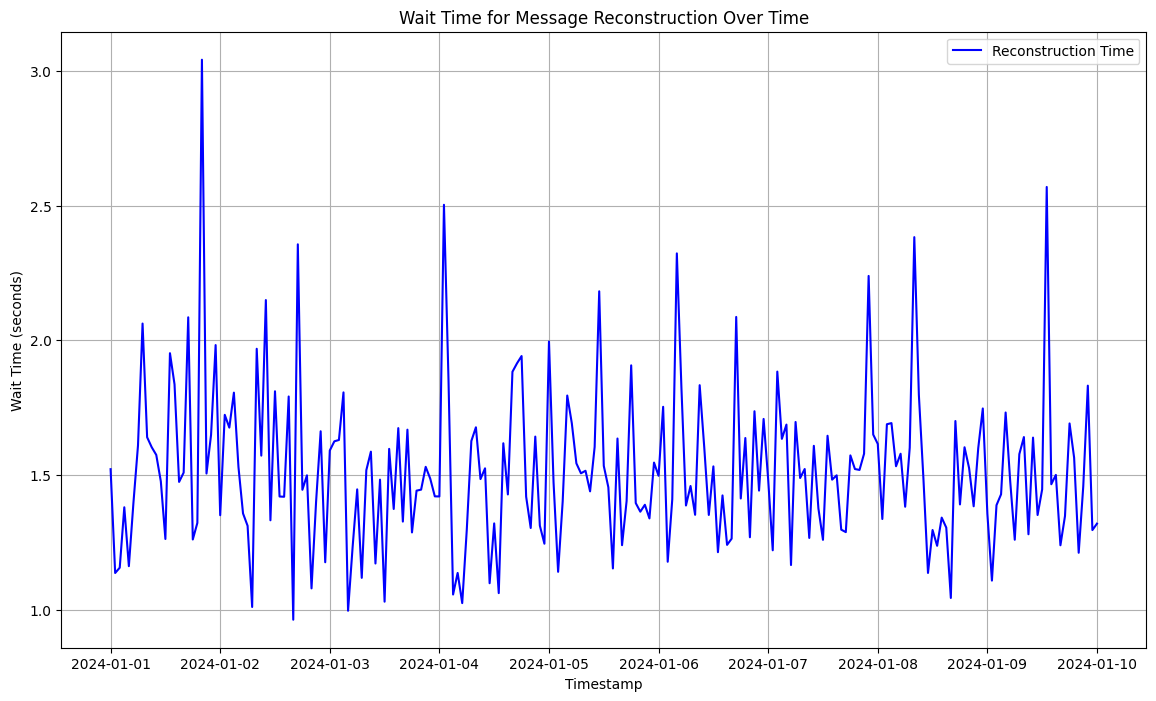

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate Synthetic Data
date_rng = pd.date_range(start='2024-01-01', end='2024-01-10', freq='H')
data = pd.DataFrame(date_rng, columns=['timestamp'])

# Simulate bandwidth data for three network paths
np.random.seed(0)
data['network1'] = np.random.normal(loc=50, scale=10, size=(len(date_rng)))
data['network2'] = np.random.normal(loc=60, scale=15, size=(len(date_rng)))
data['network3'] = np.random.normal(loc=70, scale=20, size=(len(date_rng)))
data['network4'] = np.random.normal(loc=80, scale=25, size=(len(date_rng)))

# Convert timestamp to datetime and set as index
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# Step 2: Simulate Message Sending and Receiving
message_size = 100  # size of the message in megabits

# Calculate the time to send each part of the message over the respective paths
data['time_network1'] = message_size / data['network1']
data['time_network2'] = message_size / data['network2']
data['time_network3'] = message_size / data['network3']
data['time_network4'] = message_size / data['network4']


# Determine the wait time for reconstruction (time taken for any two parts to arrive)
data['reconstruction_time'] = data[['time_network1', 'time_network2', 'time_network3', 'time_network4']].apply(lambda row: sorted(row)[1], axis=1)


# Display the first few rows of the data
data.head()

# Plot the bandwidth usage over time for each network path
plt.figure(figsize=(14, 8))
plt.plot(data.index, data['network1'], label='Network 1')
plt.plot(data.index, data['network2'], label='Network 2')
plt.plot(data.index, data['network3'], label='Network 3')
plt.plot(data.index, data['network4'], label='Network 4')

plt.title('Network Bandwidth Usage Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Bandwidth (Mbps)')
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Plot Wait Time for Reconstruction
plt.figure(figsize=(14, 8))
plt.plot(data.index, data['reconstruction_time'], label='Reconstruction Time', color='blue')


plt.title('Wait Time for Message Reconstruction Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Wait Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()





/var/folders/tr/m7nnfyd94_jfxmdwqvwq7hg40000gn/T/ipykernel_31700/92509387.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  date_rng = pd.date_range(start='2024-01-01', end='2024-01-10', freq='H')


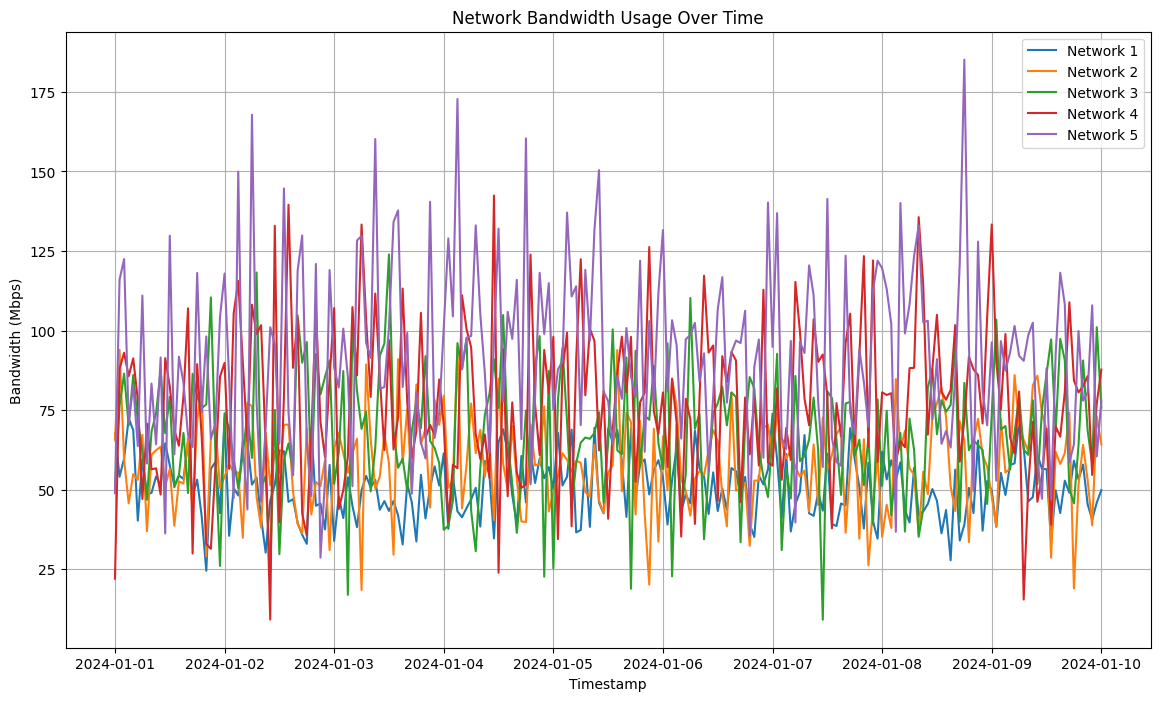

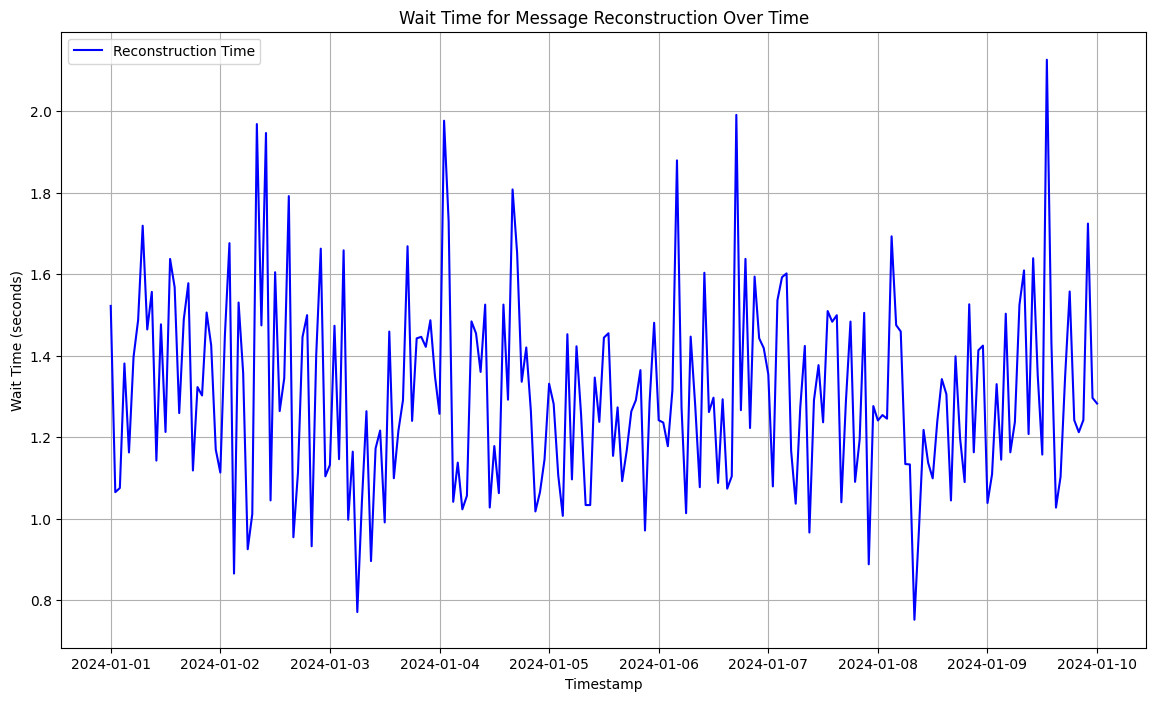

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate Synthetic Data
date_rng = pd.date_range(start='2024-01-01', end='2024-01-10', freq='H')
data = pd.DataFrame(date_rng, columns=['timestamp'])

# Simulate bandwidth data for three network paths
np.random.seed(0)
data['network1'] = np.random.normal(loc=50, scale=10, size=(len(date_rng)))
data['network2'] = np.random.normal(loc=60, scale=15, size=(len(date_rng)))
data['network3'] = np.random.normal(loc=70, scale=20, size=(len(date_rng)))
data['network4'] = np.random.normal(loc=80, scale=25, size=(len(date_rng)))
data['network5'] = np.random.normal(loc=90, scale=30, size=(len(date_rng)))

# Convert timestamp to datetime and set as index
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# Step 2: Simulate Message Sending and Receiving
message_size = 100  # size of the message in megabits

# Calculate the time to send each part of the message over the respective paths
data['time_network1'] = message_size / data['network1']
data['time_network2'] = message_size / data['network2']
data['time_network3'] = message_size / data['network3']
data['time_network4'] = message_size / data['network4']
data['time_network5'] = message_size / data['network5']

# Determine the wait time for reconstruction (time taken for any two parts to arrive)
data['reconstruction_time'] = data[['time_network1', 'time_network2', 'time_network3', 'time_network4', 'time_network5']].apply(lambda row: sorted(row)[1], axis=1)


# Display the first few rows of the data
data.head()

# Plot the bandwidth usage over time for each network path
plt.figure(figsize=(14, 8))
plt.plot(data.index, data['network1'], label='Network 1')
plt.plot(data.index, data['network2'], label='Network 2')
plt.plot(data.index, data['network3'], label='Network 3')
plt.plot(data.index, data['network4'], label='Network 4')
plt.plot(data.index, data['network5'], label='Network 5')



plt.title('Network Bandwidth Usage Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Bandwidth (Mbps)')
plt.legend()
plt.grid(True)
plt.show()

# Step 3: Plot Wait Time for Reconstruction
plt.figure(figsize=(14, 8))
plt.plot(data.index, data['reconstruction_time'], label='Reconstruction Time', color='blue')


plt.title('Wait Time for Message Reconstruction Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Wait Time (seconds)')
plt.legend()
plt.grid(True)
plt.show()



